In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Question 5

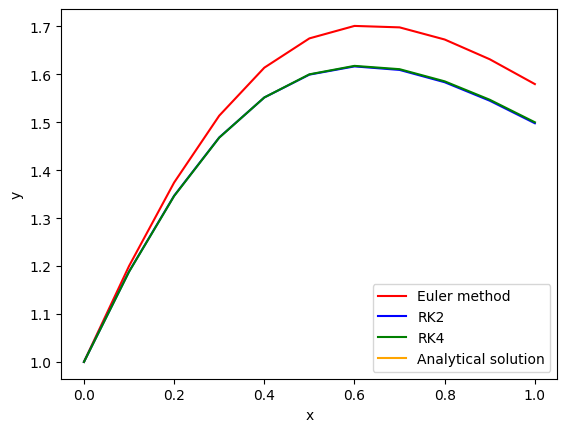

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Step size and initial values
h = 0.1
yi = 1
ti = 0
tf = 1

# Number of steps
n = int((tf - ti) / h)

# Function definition
def f(t, y):
    return (2 - 2 * y * t) / (t * t + 1)

def g(t):
    return ((2*t+1)/((t*t)+1))

# Euler Method
y_euler = [yi]
t_euler = [ti]
y = yi
t = ti
for i in range(n):
    y = y + h * f(t, y)
    t = t + h
    y_euler.append(y)
    t_euler.append(t)

# RK2 Method
def rk2(fn, y0, x0, xn, h):
    n = int((xn - x0) / h)
    y = y0
    t = x0
    ys = [y0]
    ts = [x0]
    for i in range(n):
        k1 = h * fn(t, y)
        k2 = h * fn(t + h / 2, y + k1 / 2)
        y = y + k2
        t = t + h
        ys.append(y)
        ts.append(t)
    return ts, ys

# RK4 Method
def rk4(fn, y0, x0, xn, h):
    n = int((xn - x0) / h)
    y = y0
    t = x0
    ys = [y0]
    ts = [x0]
    for i in range(n):
        k1 = h * fn(t, y)
        k2 = h * fn(t + h / 2, y + k1 / 2)
        k3 = h * fn(t + h / 2, y + k2 / 2)
        k4 = h * fn(t + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h
        ys.append(y)
        ts.append(t)
    return ts, ys

# Calculate solutions using RK2 and RK4 methods
rk2sol_t, rk2sol_y = rk2(f, yi, ti, tf, h)
rk4sol_t, rk4sol_y = rk4(f, yi, ti, tf, h)
anal=g(t)

# Plotting
plt.plot(t_euler, y_euler, color='red', label='Euler method')
plt.plot(rk2sol_t, rk2sol_y, color='blue', label='RK2')
plt.plot(rk4sol_t, rk4sol_y, color='green', label='RK4')
plt.plot(t,anal,color='orange', label='Analytical solution')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

##euler_errors = np.abs(np.interp(t_euler, anal, g(t)) - y_euler)
##rk2_errors = np.abs(np.interp(rk2sol_t, anal, g(t)) - rk2sol_y)
##rk4_errors = np.abs(np.interp(rk4sol_t, anal,g(t) )- rk4sol_y)

##table = [["Euler method", np.mean(euler_errors)],
    ##     ["RK2", np.mean(rk2_errors)],
  ##       ["RK4", np.mean(rk4_errors)]]


##headers = ["Method", "Mean Absolute Error"]
##print(tabulate(table, headers=headers))

Question 6

6a)

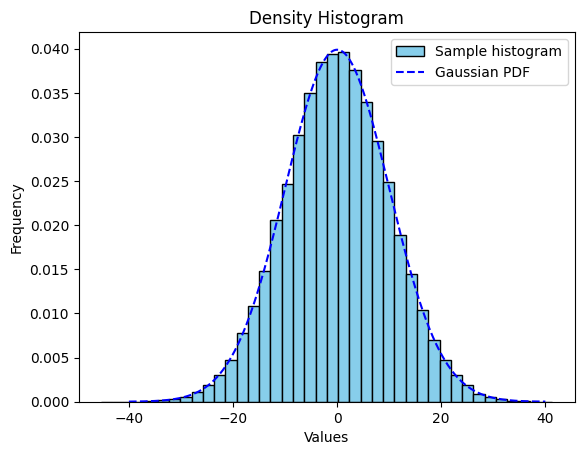

In [23]:
m=100000
mu=0
sigma=10

def gauss(y, m, s):
    z = (1 / (np.sqrt(2 * np.pi) * s)) * np.exp(-0.5 * ((y - m) / s) ** 2)
    return(z)



x=np.random.normal(0, 10, size=(m))
h = np.linspace(-40, 40, 1000)
k=gauss(h,mu,sigma)


plt.hist(x, density=True, bins=40, color='skyblue', edgecolor='black', label='Sample histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Density Histogram')
plt.plot(h,k,color='blue', linestyle='dashed',label='Gaussian PDF')
plt.legend()
plt.show()


6b)

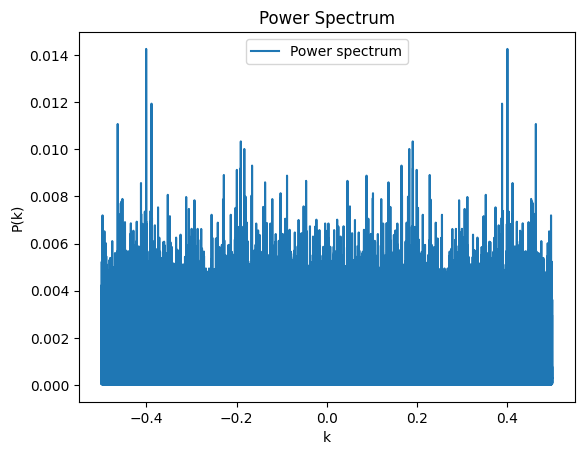

In [50]:

dft = np.fft.fft(x, norm='ortho')
power = np.abs(dft) ** 2 / m
freq = np.fft.fftfreq(m)

sorted_indices = np.argsort(freq)
plt.plot(freq[sorted_indices], power[sorted_indices], label='Power spectrum')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.title('Power Spectrum')
plt.show()

6c)

In [25]:
k_min = freq.min()
k_max = freq.max()

print("k min is ", k_min)
print("k max is ", k_max)

k max is  0.49999000000000005
k min is  -0.5


6d)

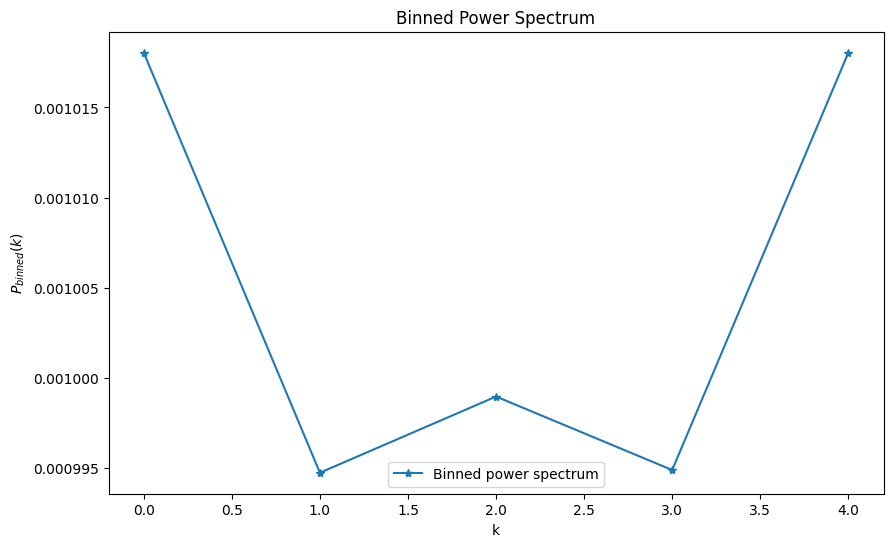

In [51]:
num_bins = 5
bin_width = m // num_bins

binned_power = np.zeros(num_bins)

for i in range(num_bins):
    binned_power[i] = np.mean(power[i*bin_width:(i+1)*bin_width])

binned_freq = np.fft.fftfreq(bin_width)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_bins), binned_power, '-*', label='Binned power spectrum')
plt.xlabel('k')
plt.ylabel('$P_{binned}(k)$')
plt.legend()
plt.title('Binned Power Spectrum')
plt.show()